In [1]:
import transformers
print(transformers.__version__)


4.51.3


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
from torch.utils.data import Dataset, DataLoader
import torch

In [3]:

from transformers import BertTokenizer, BertForSequenceClassification

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from transformers import Trainer, TrainingArguments
from torch.utils.data import Dataset, DataLoader
import torch

In [4]:
english_path = 'preprocessed_english_1.csv'
bangla_path  = 'preprocessed_bangla_1.csv'

In [5]:
import pandas as pd

df_english = pd.read_csv(english_path)
df_bangla  = pd.read_csv(bangla_path)

print("English Dataset:", df_english.shape)
print("Bangla Dataset:", df_bangla.shape)
df_english.head()
df_bangla.head()


English Dataset: (28247, 3)
Bangla Dataset: (24341, 3)


,comments,label,cleaned_text
0,ঘরে বসে শুট করতে কেমন লেগেছে? ক্যামেরাতে কে ছি...,not bully,ঘরে বসে শুট করতে কেমন লেগেছে? ক্যামেরাতে কে ছি...
1,"অরে বাবা, এই টা কোন পাগল????",not bully,"অরে বাবা, এই টা কোন পাগল????"
2,ক্যাপ্টেন অফ বাংলাদেশ,not bully,ক্যাপ্টেন অফ বাংলাদেশ
3,অন্যরকম .. ভালো লাগলো ..❤️,not bully,অন্যরকম .. ভালো লাগলো ..redheart
4,মোহাম্মদ কফিল উদ্দীন মাহমুদRidwan RomelDwaipay...,not bully,মোহাম্মদ কফিল উদ্দীন মাহমুদridwan romeldwaipay...


C:\Users\MIST LAB\AppData\Local\Temp\ipykernel_1524\431278814.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="muted")


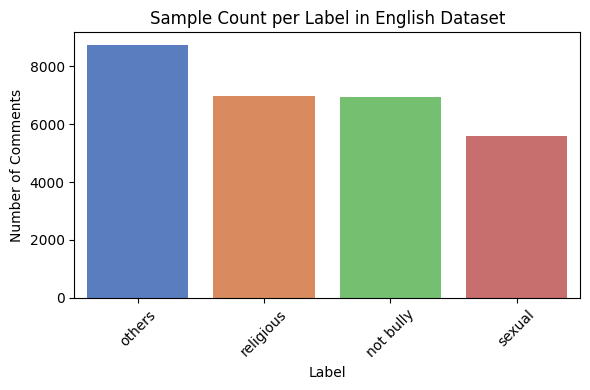

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count samples for each label in English dataset
label_counts = df_english['label'].value_counts()

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="muted")
plt.title('Sample Count per Label in English Dataset')
plt.xlabel('Label')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\MIST LAB\AppData\Local\Temp\ipykernel_1524\2498702705.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="muted")


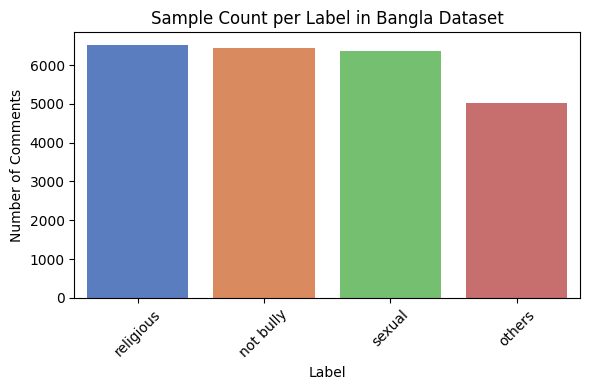

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count samples for each label in English dataset
label_counts = df_bangla['label'].value_counts()

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="muted")
plt.title('Sample Count per Label in Bangla Dataset')
plt.xlabel('Label')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [8]:
label_counts
#print(type(label_counts))

label
religious    6516
not bully    6441
sexual       6372
others       5012
Name: count, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

# Perform stratified split
b_train_df, b_test_df = train_test_split(
    df_bangla,
    test_size=0.2,
    stratify=df_bangla['label'],  # preserve label distribution
    random_state=42
)

# Optional: Check shape
print("Training set shape:", b_train_df.shape)
print("Testing set shape:", b_test_df.shape)

# Optional: Check distribution
print("\nTraining set label distribution:\n", b_train_df['label'].value_counts(normalize=False))
print("\nTesting set label distribution:\n", b_test_df['label'].value_counts(normalize=True))


Training set shape: (19472, 3)
Testing set shape: (4869, 3)

Training set label distribution:
 label
religious    5213
not bully    5153
sexual       5097
others       4009
Name: count, dtype: int64

Testing set label distribution:
 label
religious    0.267611
not bully    0.264531
sexual       0.261861
others       0.205997
Name: proportion, dtype: float64


In [10]:
from sklearn.model_selection import train_test_split

# Perform stratified split
e_train_df, e_test_df = train_test_split(
    df_english,
    test_size=0.2,
    stratify=df_english['label'],  # preserve label distribution
    random_state=42
)

# Optional: Check shape
print("Training set shape:", e_train_df.shape)
print("Testing set shape:", e_test_df.shape)

# Optional: Check distribution
print("\nTraining set label distribution:\n", e_train_df['label'].value_counts(normalize=False))
print("\nTesting set label distribution:\n", e_test_df['label'].value_counts(normalize=True))


Training set shape: (22597, 3)
Testing set shape: (5650, 3)

Training set label distribution:
 label
others       6990
religious    5591
not bully    5549
sexual       4467
Name: count, dtype: int64

Testing set label distribution:
 label
others       0.309381
religious    0.247434
not bully    0.245487
sexual       0.197699
Name: proportion, dtype: float64


In [11]:
import pandas as pd

train_df = pd.concat([e_train_df, b_train_df], ignore_index=True)
test_df = pd.concat([e_test_df, b_test_df], ignore_index=True)

print("Combined Training set shape:", train_df.shape)
print("Combined Testing set shape:", test_df.shape)

print("\nCombined Training set label distribution:\n", train_df['label'].value_counts())
print("\nCombined Testing set label distribution:\n", test_df['label'].value_counts())


Combined Training set shape: (42069, 3)
Combined Testing set shape: (10519, 3)

Combined Training set label distribution:
 label
others       10999
religious    10804
not bully    10702
sexual        9564
Name: count, dtype: int64

Combined Testing set label distribution:
 label
others       2751
religious    2701
not bully    2675
sexual       2392
Name: count, dtype: int64


In [12]:
# Get unique classes and sort for consistency
classes = sorted(train_df['label'].unique())

# Create mappings
class_to_id = {cls: idx for idx, cls in enumerate(classes)}
id_to_class = {idx: cls for cls, idx in class_to_id.items()}

# Map original labels to IDs
train_df['label_id'] = train_df['label'].map(class_to_id)

# Preview
print("Class to ID mapping:", class_to_id)
print(train_df[['label', 'label_id']].head())


Class to ID mapping: {'not bully': 0, 'others': 1, 'religious': 2, 'sexual': 3}
       label  label_id
0  not bully         0
1  religious         2
2  religious         2
3     others         1
4     others         1


In [13]:
# Get unique classes and sort for consistency
classes = sorted(test_df['label'].unique())

# Create mappings
class_to_id = {cls: idx for idx, cls in enumerate(classes)}
id_to_class = {idx: cls for cls, idx in class_to_id.items()}

# Map original labels to IDs
test_df['label_id'] = test_df['label'].map(class_to_id)

# Preview
print("Class to ID mapping:", class_to_id)
print(test_df[['label', 'label_id']].head())


Class to ID mapping: {'not bully': 0, 'others': 1, 'religious': 2, 'sexual': 3}
       label  label_id
0  religious         2
1     others         1
2  not bully         0
3  religious         2
4  religious         2


In [14]:
import numpy as np

# From training DataFrame
train_texts = np.array(train_df['cleaned_text'].values)
train_labels = np.array(train_df['label'].values)

# From test DataFrame
test_texts = np.array(test_df['cleaned_text'].values)
test_labels = np.array(test_df['label'].values)


In [15]:
print(type(train_texts))   # <class 'list'>
print(type(train_labels))  # <class 'list'>

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [16]:
# Step 1: Get all unique classes from the full dataset
all_classes = sorted(df_english['label'].unique())  # use sorted for consistent ID order

# Step 2: Create class-to-id and id-to-class mappings
class_to_id = {cls: idx for idx, cls in enumerate(all_classes)}
id_to_class = {idx: cls for cls, idx in class_to_id.items()}

# Step 3: Apply the mapping to both train and test DataFrames
train_df['label_id'] = train_df['label'].map(class_to_id)
test_df['label_id'] = test_df['label'].map(class_to_id)

# Step 4: Check mappings
print("Class to ID mapping:", class_to_id)
print(train_df[['label', 'label_id']].head())


Class to ID mapping: {'not bully': 0, 'others': 1, 'religious': 2, 'sexual': 3}
       label  label_id
0  not bully         0
1  religious         2
2  religious         2
3     others         1
4     others         1


In [17]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-uncased')

# Tokenize the text
def tokenize_function(texts):
    # Ensure all elements are strings
    texts = [str(text) for text in texts]  # Convert each element to string explicitly
    return tokenizer(texts, padding=True, truncation=True, max_length=128, return_tensors="pt")

train_encodings = tokenize_function(train_texts)
test_encodings = tokenize_function(test_texts)

In [18]:
from transformers import BertTokenizer

# Load tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-uncased')

# Choose one comment
sample_text = train_texts[0]  # or any index

# Tokenize with padding, truncation, and special tokens
encoded = tokenizer.encode_plus(
    sample_text,
    padding='max_length',
    truncation=True,
    max_length=20,  # use a small max_length to clearly see [PAD]
    return_tensors="pt"
)

# Convert input_ids to tokens
tokens = tokenizer.convert_ids_to_tokens(encoded['input_ids'][0])

# Decode back to text (includes [CLS], [SEP], not [PAD])
decoded_text = tokenizer.decode(encoded['input_ids'][0])

# Display
print(f"Original Text: {sample_text}")
print(f"\nTokenized Text (decoded): {decoded_text}")
print(f"\nTokens: {tokens}")


Original Text: fuck off i can't watch another round mkr

Tokenized Text (decoded): [CLS] fuck off i can't watch another round mkr [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]

Tokens: ['[CLS]', 'fuck', 'off', 'i', 'can', "'", 't', 'watch', 'another', 'round', 'mk', '##r', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']


In [19]:
# Create a custom dataset class
class CyberbullyingDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

In [20]:
# Label mapping
label2id = {'not bully': 0, 'religious': 1, 'others': 2, 'sexual': 3}

# Convert labels to integers
train_labels = [label2id[label] for label in train_labels]
test_labels = [label2id[label] for label in test_labels]

# Create datasets
train_dataset = CyberbullyingDataset(train_encodings, train_labels)
test_dataset = CyberbullyingDataset(test_encodings, test_labels)


In [21]:
train_dataset = CyberbullyingDataset(train_encodings, train_labels)
test_dataset = CyberbullyingDataset(test_encodings, test_labels)

# Optional: Print to confirm dataset creation
print(f"Training dataset created with {len(train_dataset)} samples.")
print(f"Testing dataset created with {len(test_dataset)} samples.")


Training dataset created with 42069 samples.
Testing dataset created with 10519 samples.


In [22]:
train_dataset

In [23]:
type(train_encodings)

transformers.tokenization_utils_base.BatchEncoding

In [24]:
type(train_labels)

list

In [25]:
train_df['label_id'].value_counts()

label_id
1    10999
2    10804
0    10702
3     9564
Name: count, dtype: int64

In [26]:
model = BertForSequenceClassification.from_pretrained('bert-base-multilingual-uncased', num_labels=4)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [27]:
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-uncased')

In [28]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available and being used:", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print("GPU not available, using CPU instead.")

GPU is available and being used: NVIDIA GeForce RTX 3070


In [29]:
from transformers import BertForSequenceClassification

# Load the PyTorch-compatible mBERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-multilingual-uncased', num_labels=len(classes))

# Move the model to device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(105879, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1

In [30]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [31]:
import evaluate

metric = evaluate.load("accuracy")

In [32]:
from torch.optim import AdamW

optimizer = AdamW(model.parameters(), lr=5e-5, weight_decay=0.05)

In [33]:
from transformers import get_scheduler

In [36]:
# Define the learning rate scheduler
num_training_steps = len(train_dataset) // training_args.per_device_train_batch_size * training_args.num_train_epochs
lr_scheduler = get_scheduler(
    "linear",  # Options: 'linear', 'cosine', 'constant', etc.
    optimizer=optimizer,
    num_warmup_steps=500,
    num_training_steps=num_training_steps
)

In [37]:
# Set up Trainer
training_args = TrainingArguments(
    output_dir="./resultsBERT0/T",  # Directory to save model checkpoints and logs
    num_train_epochs=4,  # Number of training epochs
    per_device_train_batch_size=16,  # Batch size for training
    per_device_eval_batch_size=16,  # Batch size for evaluation
    warmup_steps=500,  # Number of warmup steps for learning rate scheduler
    weight_decay=0.05,  # Weight decay (L2 regularization)
    logging_dir="./logs",  # Directory for storing logs
    logging_steps=200,  # Log metrics every 200 steps
    eval_strategy="epoch",  # Evaluate the model at the end of every epoch
    save_strategy="epoch",  # Save model at the end of every epoch
    load_best_model_at_end=True,  # Load the best model at the end of training
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
    optimizers=(optimizer, lr_scheduler)
)


In [38]:
# Train the model
trainer.train()

Epoch,Training Loss,Validation Loss


OutOfMemoryError: CUDA out of memory. Tried to allocate 312.00 MiB. GPU 0 has a total capacity of 8.00 GiB of which 0 bytes is free. Of the allocated memory 2.52 GiB is allocated by PyTorch, and 771.43 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [39]:
import torch
torch.cuda.empty_cache()

In [ ]:
# Evaluate the model
eval_results = trainer.evaluate()
print(f"Evaluation Results: {eval_results}")

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

# Get predictions on the test dataset
predictions = trainer.predict(test_dataset)

# Get predicted class labels by taking the argmax of logits
predicted_labels = np.argmax(predictions.predictions, axis=1)

# Use your original test labels from e_test_df
true_labels = test_df['label_id'].tolist()

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Display accuracy
print(f"Accuracy on test set: {accuracy:.4f}")


In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

predictions = trainer.predict(test_dataset)
predicted_labels = np.argmax(predictions.predictions, axis=1)

# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Get model predictions
predictions, labels, _ = trainer.predict(test_dataset)

# Convert logits to predicted labels
predicted_labels = np.argmax(predictions, axis=1)

# Compute metrics
accuracy = accuracy_score(labels, predicted_labels)
precision, recall, f1, _ = precision_recall_fscore_support(labels, predicted_labels, average="weighted")

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")


In [ ]:
train_results = trainer.evaluate(train_dataset)
print("Training Set Metrics:", train_results)


In [ ]:
import torch

# Define the path to save the model
model_path = "mbert1_model.pth"  # This will save in the same directory as the notebook

# Save only the model's weights
torch.save(model.state_dict(), model_path)
print(f"Model weights saved to {model_path}")


In [ ]:
torch.save(train_dataset, "mbert1_train_dataset.pth")


In [ ]:
torch.save(test_dataset, "mbert1_test_dataset.pth")

In [ ]:
import torch
torch.save(test_texts, "multi_test_texts.pth")


In [ ]:
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
from collections import Counter
from transformers import BertForSequenceClassification

# Define the same model architecture
mbert_model = BertForSequenceClassification.from_pretrained('bert-base-multilingual-uncased', num_labels=4)

# Load the saved weights
mbert_model.load_state_dict(torch.load("mbert1_model.pth", map_location=torch.device('cpu')))

# Set the model to evaluation mode
mbert_model.eval()

print("mBERT1 model loaded successfully!")

In [ ]:
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
from collections import Counter
from transformers import BertForSequenceClassification

# Define the same model architecture
mbert_model = BertForSequenceClassification.from_pretrained('bert-base-multilingual-uncased', num_labels=4)

# Load the saved weights
mbert_model.load_state_dict(torch.load("mbert1_model.pth", map_location=torch.device('cpu')))

# Set the model to evaluation mode
mbert_model.eval()

print("mBERT model loaded successfully!")



from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score
from tqdm import tqdm
class CyberbullyingDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item
        
mbert_test_dataset = torch.load("mbert1_test_dataset.pth")


def evaluate_model(model, test_dataset, batch_size=16):
    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in tqdm(test_loader, desc="Evaluating"):
            inputs = {key: val.to(device) for key, val in batch.items() if key != "labels"}
            labels = batch["labels"].to(device)

            outputs = model(**inputs)
            logits = outputs.logits
            preds = torch.argmax(logits, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    return accuracy, all_preds, all_labels


mbert_accuracy, predictions, true_labels = evaluate_model(mbert_model, mbert_test_dataset)

print(f"mBERT Model Accuracy: {mbert_accuracy:.4f}")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    precision_recall_fscore_support,
    roc_auc_score,
    cohen_kappa_score
)
from sklearn.preprocessing import label_binarize


class_names = ['not bully', 'religious', 'others', 'sexual']

cm = confusion_matrix(true_labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix - mBERT Model(Multilingual)")
plt.show()


In [ ]:
print("\nClassification Report:")
print(classification_report(true_labels, predictions, target_names=class_names))


In [ ]:
kappa = cohen_kappa_score(true_labels, predictions)
print(f"\nCohen's Kappa Score: {kappa:.4f}")

In [ ]:
import torch
from torch.utils.data import DataLoader
from tqdm import tqdm
import numpy as np

def evaluate_logits(model, dataset, batch_size=16):
    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)
    all_labels = []
    all_probs = []

    with torch.no_grad():
        for batch in tqdm(loader, desc="Evaluating"):
            # Your dataset returns dict with keys: 'input_ids', 'attention_mask', 'labels'
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            probs = torch.softmax(outputs.logits, dim=1)

            all_probs.append(probs.cpu().numpy())
            all_labels.append(labels.cpu().numpy())

    all_probs = np.concatenate(all_probs, axis=0)
    all_labels = np.concatenate(all_labels, axis=0)

    return all_probs, all_labels


probs, y_true = evaluate_logits(mbert_model, mbert_test_dataset)
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

y_true_bin = label_binarize(y_true, classes=[0, 1, 2, 3])
roc_auc = roc_auc_score(y_true_bin, probs, average='macro')
print(f"Macro ROC-AUC Score: {roc_auc:.4f}")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Your class names
class_names = ['not bully', 'religious', 'others', 'sexual']

# Binarize true labels
y_true_bin = label_binarize(y_true, classes=[0, 1, 2, 3])
n_classes = y_true_bin.shape[1]

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Create single ROC plot
plt.figure(figsize=(6, 4))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"{class_names[i]} (AUC = {roc_auc[i]*100:.2f}%)")

# Plot the diagonal reference line
plt.plot([0, 1], [0, 1], 'k--', label='Chance (AUC = 50%)')

# Formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curves - mBERT Model(Multilingual Dataset)')
plt.legend(loc="lower right", fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.savefig("mbert1_roc_curve.png", dpi=300)
plt.show()


In [ ]:
import os
import torch
model_size_kb = os.path.getsize("mbert1_model.pth") / 1024
print(f"Model size: {model_size_kb:.0f} KB")

model = BertForSequenceClassification.from_pretrained('bert-base-multilingual-uncased', num_labels=4)

# Count trainable parameters
param_count = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Parameter count: {param_count}")


In [ ]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(true_labels, predictions)
print(f"MCC: {mcc * 100:.2f}%")
